In [15]:
import os
import sys
import csv
import pandas as pd 
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline


# for better visualization
sns.set(style="whitegrid")


In [2]:
# load the data
raw_data = pd.read_csv('responses.csv')
display(raw_data.head())

,Timestamp,"By selecting the ""I agree"" button option, you indicate that you have read the information provided above, that you voluntarily agree to participate in this study, and that you are at least 18 years of age.",What is your field of study?,"If you are pursuing an undergraduate degree, what year are you in? If you are pursuing graduate degree (including dual degree students) what is the degree you are pursuing? If you are a faculty, what is your position? \n\n(Please utilize ""Other..."" option and enter accordingly if there are no available options below or you are not clear about the options or you believe the options may not accurately reflect your response)",How would you rate your familiarity with LLMs?,How well do you trust LLM's?,"If you have any experience working with/using LLM, please list/describe any of them.","In what area do you think LLMs will be most used in the future? (e.g., education, healthcare, entertainment, programming, content generation, law etc.)",What specific tasks or functions do you envision LLMs being used for in that area in the future (other than those mentioned above)?,"Given your academic/professional background, what security vulnerabilities or privacy risks do you think might arise from the increased reliance on LLMs in everyday tasks and interactions in your field",...,"In what ways can interdisciplinary collaboration between experts in AI, ethics, law, psychology, and other fields help identify and mitigate the risks associated with LLMs?","Do you believe LLMs should have the capability to fingerprint users and identify them based on their inputs? If yes, do you foresee any potential privacy or security risks associated with this feature?","With the development of AI models that can understand text, images, and audio together, do you think there could be any additional security concerns? List those concerns below",How well do you Trust LLM's now?,Your Email,Are you willing to participate in 10 minutes virtual or in-person follow-up interview?,Your Name,What days and times are you free this week or next week?,"What is your field of study/major/profession?\n\n(Please utilize ""Other..."" option and enter accordingly if there are no available options below or you are not clear about the options or you believe the options may not accurately reflect your response)",What is the
0,3/23/2024 16:38:40,NaN,Computer Science,Masters/Dual Degree,8,8,NaN,Data analysis,help people understand their data better,N,...,N,N,N,NaN,NaN,No,NaN,NaN,NaN,NaN
1,3/25/2024 10:23:40,I agree,Engineering,Senior,5,3,utilizing ChatGPT， image generation service,healthcare,perform diagnosis and interact with patient,"untrustworthy information generation (code, fa...",...,companies have an incentive to disregard ethic...,"yes. Much like search engine, profiling would ...",NaN,3.0,NaN,No,NaN,NaN,NaN,NaN
2,3/25/2024 10:46:08,I agree,Engineering,Professor,10,1,Use them to understand LLMs so that I can carr...,Almost all aspects of life,Almost all aspects of life,A lot,...,A lot,A lot,A lot,1.0,umar.iqbal@wustl.edu,Yes,Umar Iqbal,Monday 12:30 to 1:30 or after class,NaN,NaN
3,3/25/2024 14:04:38,I agree,Arts and Science,Sophomore,3,5,"chatGPT, google translate",healthcare,"analyzing and communicating patient feedback,",people's private information being shared afte...,...,a combined approach between many fields can mi...,"Yes, I think they should. I foresee many priva...",yes. I think that it may become harder to iden...,3.0,h.l.woodhouse@wustl.edu,Yes,Hannah Woodhouse,"Wednesday, Friday after 2:00, Tuesday Thursday...",NaN,NaN
4,3/25/2024 14:24:00,I agree,Engineering,Junior,1,3,"Rare use of ChatGPT, frequent use of Google Tr...",Programming,"Debugging code, providing sample programs.",Negligence to verify sources of information\nU...,...,Monitor and prohibit use of data containing pe...,This question depends on the purpose of the LL...,Impersonation.\nNon-consensual fabrication of ...,2.0,m.takato@wustl.edu,No,NaN,NaN,Na

In [3]:
# rename raw_data columns
new_columns = ['timestamp', 'field_of_study', 'education', 'familiarity', 'initial_trust', 'experience', 'future_area', 'future_tasks', 'reliance_risk', 'possible_exploitation', 'privacy_concern', 'other_risks', 'vulnerable_sector', 'interdisciplinary', 'fingerprint', 'comprehension_concern', 'final_trust', 'field_of_study.1']

# drop columns that are not needed
columns_to_drop = [
                    'By selecting the "I agree" button option, you indicate that you have read the information provided above, that you voluntarily agree to participate in this study, and that you are at least 18 years of age.', 
                   'Your Email',
                   'Are you willing to participate in 10 minutes virtual or in-person follow-up interview?', 
                   'Your Name',
                   'What days and times are you free this week or next week?',
                   'What is the '
                   ]
pp_data = raw_data.drop(columns=columns_to_drop)

# rename columns
pp_data.columns = new_columns

# merge field of study columns 
# accidentally deleted the first field of study in survey, so need to merge the two columns
pp_data['field_of_study'] = pp_data['field_of_study'].fillna(pp_data['field_of_study.1'])
pp_data = pp_data.drop(columns=['field_of_study.1'])
display(pp_data)

,timestamp,field_of_study,education,familiarity,initial_trust,experience,future_area,future_tasks,reliance_risk,possible_exploitation,privacy_concern,other_risks,vulnerable_sector,interdisciplinary,fingerprint,comprehension_concern,final_trust
0,3/23/2024 16:38:40,Computer Science,Masters/Dual Degree,8,8,NaN,Data analysis,help people understand their data better,N,Help terrorist make bomb,N,N,N,N,N,N,NaN
1,3/25/2024 10:23:40,Engineering,Senior,5,3,utilizing ChatGPT， image generation service,healthcare,perform diagnosis and interact with patient,"untrustworthy information generation (code, fa...","phishing, spamming, impersonation",information leakage - no cache policy,unemployment,"SDE, customer service",companies have an incentive to disregard ethic...,"yes. Much like search engine, profiling would ...",NaN,3.0
2,3/25/2024 10:46:08,Engineering,Professor,10,1,Use them to understand LLMs so that I can carr...,Almost all aspects of life,Almost all aspects of life,A lot,A lot,A lot,A lot,A lot,A lot,A lot,A lot,1.0
3,3/25/2024 14:04:38,Arts and Science,Sophomore,3,5,"chatGPT, google translate",healthcare,"analyzing and communicating patient feedback,",people's private information being shared afte...,LLMs might have the potential to be very good ...,they may take in information about people's pe...,"in my field, data science, use of LLMs on data...","yes, I think healthcare may be because they ha...",a combined approach between many fields can mi...,"Yes, I think they should. I foresee many priva...",yes. I think that it may become harder to iden...,3.0
4,3/25/2024 14:24:00,Engineering,Junior,1,3,"Rare use of ChatGPT, frequent use of Google Tr...",Programming,"Debugging code, providing sample programs.",Negligence to verify sources of information\nU...,More-sophisticated online scamming,"Jailbreaking, for the purpose of revealing pro...",Casual mistreatment of AI.\nAccidental use of ...,"Education, specifically any institution which ...",Monitor and prohibit use of data containing pe...,This question depends on the purpose of the LL...,Impersonation.\nNon-consensual fabrication of ...,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,4/2/2024 20:30:49,Computer Science,Junior,2,5,"ChatGPT, Siri and google translate",Learning new content instead of using google I...,Short and quick explanation for task. Finding ...,Location access is something I see from increa...,"Beaches of the large access of data LLM has, ...",LLM can. I promise user privacy,It can create antisocial answers that contradi...,Definitely costumer care services are at risk ...,I think experts can leverage responses from al...,Never!,"Definitely, there should be monitoring of dere...",2.0
72,4/2/2024 22:46:52,Computer Science,Junior,6,2,"use of chatGPT, microsoft copilot",Entertainment,"creating movie/tv show scripts, also for books...",I think using them for coding is becoming more...,Im sure they are already used for phishing sca...,The data provided by the user could be at risk...,Automated vulnerability testing on software. R...,"Computing, such as the risk I mentioned above",I think it will take some time for experts in ...,"No, i think user input should be anonymous. Ty...","Yes, this could make data collection far more ...",2.0
73,4/3/2024 21:47:00,Arts and Science,Junior,5,5,using ChatGPT for help studying/interview prep...,education/research and general business/corpor...,"idea generation, help with conducting research...",increased interactions would probably result i...,trick people into following links that are act...,tracking/storing information that could be acc...,lack of originality/issues within stolen resea...,creative industries,working together to identify potential risks a...,no,the current security concerns would be augment...,5.0
74,4/3/2024 22:31:28,Engineering,Junior,6,5,"ChatGPT, google translate, image generation, s...",I believe that LLMs will be most useful in hea...,Some specific tasks include mapping tumors

# Data Analysis

In [4]:
# Descriptive statistics
print("Descriptive Statistics:")
print(pp_data [['familiarity', 'initial_trust', 'final_trust']].describe())

# Calculating mode (note: mode could be multi-modal)
print("\nMode:")
print(pp_data [['familiarity', 'initial_trust', 'final_trust']].mode().head(1))



Descriptive Statistics:
       familiarity  initial_trust  final_trust
count    76.000000      76.000000    75.000000
mean      4.289474       4.894737     3.986667
std       2.359750       2.036853     2.010065
min       1.000000       1.000000     1.000000
25%       2.000000       3.000000     3.000000
50%       5.000000       5.000000     4.000000
75%       6.000000       6.000000     5.000000
max      10.000000      10.000000    10.000000

Mode:
   familiarity  initial_trust  final_trust
0          5.0            5.0          3.0


## Simple linear regression analysis to explore relationships between variables familiarity with LLMs and initial trust levels.

In [5]:
import statsmodels.api as sm

# Simple linear regression
X = sm.add_constant(pp_data['familiarity'])  # adding a constant
Y = pp_data['initial_trust']

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

# Print out the statistics
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          initial_trust   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9850
Date:                Mon, 15 Apr 2024   Prob (F-statistic):              0.324
Time:                        10:11:22   Log-Likelihood:                -160.90
No. Observations:                  76   AIC:                             325.8
Df Residuals:                      74   BIC:                             330.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.4704      0.487      9.175      

### Response Analysis

From the OLS regression results, we can gather several insights:

1. **R-squared**: The R-squared value is 0.013, which indicates that only about 1.3% of the variation in initial trust levels is explained by the variation in familiarity with LLMs. This suggests that familiarity with LLMs alone does not strongly predict initial trust levels.

2. **Coefficient Estimates**: The coefficient for the variable "familiarity" is 0.0989. This suggests that for every one-unit increase in familiarity with LLMs, initial trust levels increase by approximately 0.0989 units. However, since the coefficient is not statistically significant (p-value = 0.324), we cannot conclude that this relationship is not likely due to random chance.

3. **Intercept**: The intercept (const) is 4.4704. This represents the estimated initial trust level when familiarity with LLMs is zero.

4. **Statistical Significance**: The p-values associated with the coefficient estimates provide information about their statistical significance. In this case, the p-value for the coefficient of "familiarity" is 0.324, which is greater than the typical significance level of 0.05. This suggests that familiarity with LLMs is not a statistically significant predictor of initial trust levels in this model.

5. **Model Fit**: The F-statistic is 0.9850 with a associated probability of 0.324. This suggests that the overall fit of the model is not statistically significant, further indicating that familiarity with LLMs alone may not be a strong predictor of initial trust levels.

6. **Assumptions**: The assumptions of linear regression (e.g., normality of residuals, homoscedasticity) should be assessed to ensure the validity of the model results.

In summary, based on these results, familiarity with LLMs does not appear to be a significant predictor of initial trust levels. Additional factors or a more complex model may be needed to better understand the determinants of initial trust in LLMs.

### lda word cloud

In [6]:
# analyze experience using scikit lda and visualize using wordcloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from wordcloud import WordCloud
from tokenizers import Tokenizer
from tokenizers.models import BPE
from transformers import PreTrainedTokenizerFast
import re, nltk, spacy, gensim
from transformers import AutoTokenizer



In [38]:
from spacy.lang.en import stop_words as stop_words

# remove NaN values
experience_data = pp_data['experience'].dropna()

# lowercase the data
experience_data = experience_data.str.lower()

# tokenize the data using spaCy
nlp = spacy.load('en_core_web_sm')
experience_data = experience_data.apply(lambda x: nlp(x))
# print(experience_data)

# remove stop words
experience_data = experience_data.apply(lambda x: [token for token in x if not token.is_stop])
# print(experience_data)

# remove special characters
experience_data = experience_data.apply(lambda x: [token for token in x if token.is_alpha])

# lemmatize the data
experience_data = experience_data.apply(lambda x: [token.lemma_ for token in x])




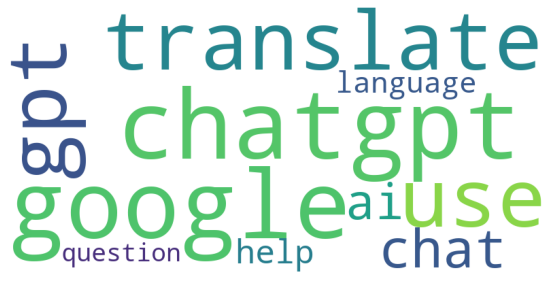

In [43]:
# lda
vectorizer = CountVectorizer()
data_vectorized = vectorizer.fit_transform(experience_data.apply(lambda x: ' '.join(x)))

lda_model = LDA(n_components=1, learning_method='online', random_state=0, n_jobs=-1)
lda_output = lda_model.fit_transform(data_vectorized)

# visualize lda
# get the feature names
words = vectorizer.get_feature_names_out()
# get the topic names
# topic_names = ['Topic' + str(i) for i in range(lda_model.n_components)]
# make the wordcloud
for i, topic in enumerate(lda_model.components_):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join([words[i] for i in topic.argsort()[:-10 - 1:-1]]))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud)
    plt.axis('off')
    # plt.title('')
    plt.show()

## sentiment analysis on fingerprinting

In [9]:
# huggingface sentiment analysis on fingerprint

# load the sentiment analysis pipeline
sentiment_analysis = pipeline(model='nlptown/bert-base-multilingual-uncased-sentiment')

# analyze the fingerprint data
fingerprint_data = pp_data['fingerprint'].dropna()
fingerprint_data = fingerprint_data.to_list()
print(fingerprint_data)

# analyze the sentiment of the fingerprint data
sentiment_results = sentiment_analysis(fingerprint_data)
print(sentiment_results)




huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Downloading:   0%|          | 0.00/3.58k [00:00<?, ?B/s]

['N', 'yes. Much like search engine, profiling would be problematic.', 'A lot', 'Yes, I think they should. I foresee many privacy risks, as whoever owns the data for the LLM could see a lot of information about a person', 'This question depends on the purpose of the LLM.\nShould an LLM be trained on sensitive, private, confidential, or otherwise non-civilian information (ex. for government or internal corporate use), fingerprinting would be an effective security deterrent against misuse, and would provide accountability. \nHowever, for public LLMs, fingerprinting seems excessive. \nIn both cases, I believe any training of LLMs on fingerprint data is a terrible idea. ', 'I think it is possible for LLMs to be able to do this, however, I think that this presents multiple privacy concerns related to ads and tracking. ', 'No', 'No ', 'No. This is a huge risk to have such valuable personal identification stored into such a novel and complex platform that can be subject to abuse.', "doesn't m

    label     score
0       1  0.217897
1       3  0.483295
2       3  0.376295
3       4  0.346079
4       2  0.482752
..    ...       ...
61      1  0.787573
62      1  0.357564
63      1  0.531922
64      4  0.451561
65      2  0.448000

[66 rows x 2 columns]


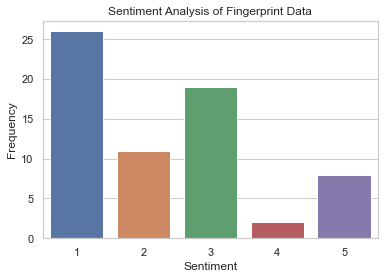

In [10]:
# visualize the sentiment of the fingerprint data
sentiment_results = pd.DataFrame(sentiment_results)
# change the 1 star to 1
sentiment_results['label'] = sentiment_results['label'].replace('1 star', 1)
# change the 2 star to 2
sentiment_results['label'] = sentiment_results['label'].replace('2 stars', 2)
# change the 3 star to 3
sentiment_results['label'] = sentiment_results['label'].replace('3 stars', 3)
# change the 4 star to 4
sentiment_results['label'] = sentiment_results['label'].replace('4 stars', 4)
# change the 5 star to 5
sentiment_results['label'] = sentiment_results['label'].replace('5 stars', 5)

print(sentiment_results)

# plot the sentiment of the fingerprint data
sns.countplot(x='label', data=sentiment_results)
plt.xlabel("Sentiment")
plt.ylabel("Frequency")
plt.title("Sentiment Analysis of Fingerprint Data")

# show frequency of sentiment

plt.show()
# plt.title("Sentiment Analysis of Fingerprint Data")
# plt.show()


### familiarity and trust

In [49]:
# load initial trust and final trust data
initial_trust = pp_data['initial_trust']
initial_trust = initial_trust.dropna()
# load familiarity data
familiarity = pp_data['familiarity']
familiarity = familiarity.dropna()
# correlation between familiarity and initial trust
correlation = familiarity.corr(initial_trust, method='pearson')
print("Correlation between familiarity and initial trust: ", correlation)

# correlation between familiarity and final trust
final_trust = pp_data['final_trust']
final_trust = final_trust.dropna()
correlation = familiarity.corr(final_trust, method='pearson')
print("Correlation between familiarity and final trust: ", correlation)

# correlation between initial trust and final trust
correlation = initial_trust.corr(final_trust, method='pearson')
print("Correlation between initial trust and final trust: ", correlation)


Correlation between familiarity and initial trust:  0.11461170637929399
Correlation between familiarity and final trust:  0.2338435456938819
Correlation between initial trust and final trust:  0.7890264696195953


### demographics of the participants


,field_of_study
0,Computer Science
1,Engineering
2,Engineering
3,Arts and Science
4,Engineering
5,Engineering
6,Arts and Science
7,Nursing
8,Chemistry
9,Computer Science


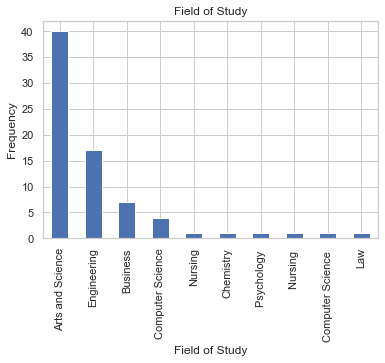

In [12]:
# field of study, education, familiarity, initial trust, and experience
# analyze field of study
field_of_study_data = pp_data['field_of_study'].dropna()
# do not truncate the data
field_of_study_data=pd.DataFrame(field_of_study_data)
pd.set_option('display.max_rows', None)

# display(field_of_study_data)

# merge psychology into arts and science
field_of_study_data['field_of_study'] = field_of_study_data['field_of_study'].replace('Psychology', 'Arts and Science')

# rename legal studies to law
field_of_study_data['field_of_study'] = field_of_study_data['field_of_study'].replace('Legal (practicing attorney)', 'Law')

display(field_of_study_data)
# plot using plt
field_of_study_data['field_of_study'].value_counts().plot(kind='bar')
plt.xlabel("Field of Study")
plt.ylabel("Frequency")
plt.title("Field of Study")
plt.show()


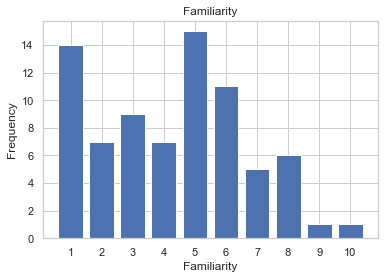

Mean of familiarity:  4.2894736842105265
Median of familiarity:  5.0


In [13]:
# plot familiarity
familiarity_data = pp_data['familiarity'].dropna()
familiarity_data = familiarity_data.value_counts()
plt.bar(familiarity_data.index, familiarity_data.values)

# show all xticks
plt.xticks(familiarity_data.index)
plt.xlabel("Familiarity")
plt.ylabel("Frequency")
plt.title("Familiarity")
plt.show()

# get the mean of familiarity
familiarity_mean = pp_data['familiarity'].mean()
print("Mean of familiarity: ", familiarity_mean)

# get median of familiarity
familiarity_median = pp_data['familiarity'].median()
print("Median of familiarity: ", familiarity_median)

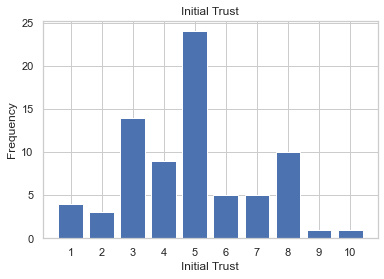

Mean of initial trust:  4.894736842105263
Median of initial trust:  5.0


In [14]:
# analyze initial trust
initial_trust_data = pp_data['initial_trust'].dropna()
initial_trust_data = initial_trust_data.value_counts()
plt.bar(initial_trust_data.index, initial_trust_data.values)

# show all xticks
plt.xticks(initial_trust_data.index)
plt.xlabel("Initial Trust")
plt.ylabel("Frequency")
plt.title("Initial Trust")
plt.show()

# get the mean of initial trust
initial_trust_mean = pp_data['initial_trust'].mean()
print("Mean of initial trust: ", initial_trust_mean)

# get median of initial trust
initial_trust_median = pp_data['initial_trust'].median()
print("Median of initial trust: ", initial_trust_median)


# lda word cloud generation on basically all of free response questions


In [ ]:
# analyze experience